In [2]:
from PIL import Image
import PIL

**이미지 불러오기**

In [3]:
im = Image.open('cat.jpg')
im.show()

**이미지 크기 변경 (+리샘플링 옵션)**

In [4]:
img_resize = im.resize((700,300))
img_resize.show()

**이미지 자르기 (crop)**

In [5]:
width, height = im.size
 
left = 4
top = height / 5
right = 700
bottom = 3 * height / 4
 
im1 = im.crop((left, top, right, bottom))
newsize = (300, 300)
im1 = im1.resize(newsize)

im1.show()

**이미지 회전 (rotate)**

In [6]:
im1 = im.rotate(90, PIL.Image.NEAREST, expand = 1)

im1.show()

**이미지 상하, 좌우대칭 (flip)**

In [7]:
vertical_img = im.transpose(method=Image.FLIP_TOP_BOTTOM)
vertical_img.save("vertical.png")

vertical_img.show()

**이미지 필터링 (blur, contour, detail, smooth, etc.)**

In [8]:
#blur
from PIL import ImageFilter

im1 = im.filter(ImageFilter.BLUR)

im1.show()


In [9]:
#contour
contour_filter = ImageFilter.Kernel((3,3),(-1,-1,-1,-1,8.5,-1,-1,-1,-1), scale=1)

img_contour = im.filter(contour_filter)

img_contour.show()

In [10]:
#detail
img_detail = im.filter(ImageFilter.DETAIL)
img_detail.show()

In [11]:
#smooth
img_smooth = im.filter(ImageFilter.SMOOTH)
img_smooth.show()

In [12]:
#smooth_more
img_smooth = im.filter(ImageFilter.SMOOTH_MORE)
img_smooth.show()

**이미지 합치기 && 이미지 저장**

In [14]:
from PIL import Image

img_01 = Image.open("bird.jpg")
img_02 = Image.open("cat.jpg")

img_01_size = img_01.size
img_02_size = img_02.size

print('img 1 size: ', img_01_size)
print('img 2 size: ', img_02_size)

new_im = Image.new('RGB', (2*img_01_size[0],2*img_01_size[1]), (250,250,250))

new_im.paste(img_01, (0,0))
new_im.paste(img_02, (img_01_size[0],0))

new_im.save("cat&bird.jpg", "JPEG")
new_im.show()

img 1 size:  (543, 742)
img 2 size:  (804, 1280)


**이미지를 바이트배열로 변환 하기 && 넘파이(numpy)배열을 이미지로 변환하기**

In [2]:
from PIL import Image
import io

image = Image.open("cat.jpg")

with io.BytesIO() as output:
    image.save(output, format="JPEG")
    image_byte_array = output.getvalue()

print(image_byte_array)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x05\x00\x03$\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4

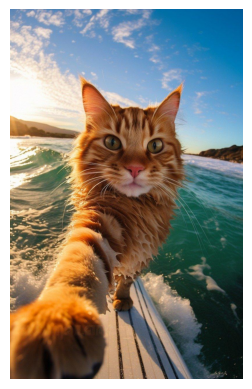

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bytes = image_byte_array 

image_array = np.frombuffer(image_bytes, dtype=np.uint8)

decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()